In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 维护着状态，以及 step 函数的返回
class MazeEnv(gym.Env):
    def __init__(self):
        self.state = 0
        pass
    
    def reset(self):
        self.state = 0
        return self.state
    
    def step(self, action):
        if action == 0:
            self.state -= 3
        elif action == 1:
            self.state += 1
        elif action == 2:
            self.state += 3
        elif action == 3:
            self.state -= 1
        done = False
        if self.state == 8:
            done = True
        return self.state, 1, done, {}

NameError: name 'gym' is not defined

In [10]:
# 动作策略选择，基于当前环境的状态
class Agent:
    def __init__(self):
        self.actions = list(range(4))
        self.theta_0 = np.asarray([[np.nan, 1, 1, np.nan],      # s0
                      [np.nan, 1, np.nan, 1],      # s1
                      [np.nan, np.nan, 1, 1],      # s2
                      [1, np.nan, np.nan, np.nan], # s3 
                      [np.nan, 1, 1, np.nan],      # s4
                      [1, np.nan, np.nan, 1],      # s5
                      [np.nan, 1, np.nan, np.nan], # s6 
                      [1, 1, np.nan, 1]]           # s7
                     )
        self.pi = self._cvt_theta_0_to_pi(self.theta_0)
        
    def _cvt_theta_0_to_pi(self, theta):
        m, n = theta.shape
        pi = np.zeros((m, n))
        for r in range(m):
            pi[r, :] = theta[r, :] / np.nansum(theta[r, :])
        return np.nan_to_num(pi)
    
    def choose_action(self, state):
        action = np.random.choice(self.actions, p=self.pi[state, :])
        return action

In [27]:
env = MazeEnv()
state = env.reset()
agent = Agent()

In [28]:
done = False
action_history = []
state_history = [state]
while not done:
    action = agent.choose_action(state)
    state, reward, done, _ = env.step(action)
    action_history.append(action)
    state_history.append(state)

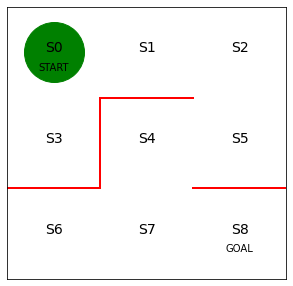

In [30]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

# plt.plot([1, 1], [0, 1], color='red', linewidth=2)
# plt.plot([1, 2], [2, 2], color='red', linewidth=2)
# plt.plot([2, 2], [2, 1], color='red', linewidth=2)
# plt.plot([2, 3], [1, 1], color='red', linewidth=2)

plt.plot([2, 3], [1, 1], color='red', linewidth=2)
plt.plot([0, 1], [1, 1], color='red', linewidth=2)
plt.plot([1, 1], [1, 2], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')
# plt.axis('off')
plt.tick_params(axis='both', which='both', 
                bottom=False, top=False, 
                right=False, left=False,
                labelbottom=False, labelleft=False
               )
line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)

In [31]:
from matplotlib import animation
from IPython.display import HTML

In [32]:
def init():
    line.set_data([], [])
    return (line, )
def animate(i):
    state = state_history[i]
    x = (state % 3)+0.5
    y = 2.5 - int(state/3)
    line.set_data(x, y)

In [33]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)

In [34]:
HTML(anim.to_jshtml())

In [35]:
anim.save('save/maze_2.mp4')